## Assignment 4
### Raymundo Gonzalez Leal

## German tank problem

In the second world war allied forces needed to estimate the number of German tanks. Whenever a tank was captured the allies were able to observe its serial number. A serial number consists of a single letter identifying the factory, and the sequential id of that particular tank. After one battle the allies were able to observe the following serial numbers:

[M98, M508, M727, M520, K85, K58, K13, K7, K74, K75, K64, F225, F292, F241, F453, F464, F165, F182, F334, F88]

###### Assumption: In this problem description we are not being told that tanks are being built in batches of 100, and that not all numbers in a batch of 100 had to be used (this is said in the example in the book). As we are not told that, I will assume that seing tank number F241 assures that factory F made at least 241 tanks.

#### Write out the likelihood of observing a single tank.


$P(x | N) = \frac{1}{N}$   for $N \geq x$ 

$P(x | N) = 0 $   for $N < x$ 


#### Derive the maximum likelihood formula for the total number of tanks given a dataset as above.


[M98, M508, M727, M520]

[K85, K58, K13, K7, K74, K75, K64]

[F225, F292, F241, F453, F464, F165, F182, F334, F88]


Here are my assumptions:

There are only 3 tank factories, which correspond to the labels M, K, and F.

Factories are independent, so that the observations of tanks coming from one factory will not affect our beliefs about the tanks from the other factories.

Under these assumptions, we can divide the problem into the three factories


For a single factory, let $m$ be the greatest number observed, and $N$ be the total number of tanks for that factory. Furthermore, let $k$ be the number of observed tanks for that factory. The likelihood that out of our $k$ observed numbers the largest observation will be $m$ is:

$P(m | N) = \frac{{m-1}\choose{k-1}}{{N}\choose{k}}$   for $N \geq m$ 

$P(m | N) = 0 $   for $N < m$ 

(We can understand this formula as the number of ways in which we can choose $m$ and $k-1$ numbers smaller than $m$, divided by the total amount of combinations of $k$ tank numbers we could have seen for that factory)

We see that the likelihood is maximum with the smallest value of $N_k$ that is still greater than or equal to $X_k$. So the likelihood is maximum when 

Now for each factory:

#### Factoy M

$P(727 | N_M) = \frac{{726}\choose{3}}{{N_M}\choose{4}}$   for $N_M \geq 727$ 

$P(727 | N_M) = 0 $   for $N < 727$ 


#### Factoy K

$P(85 | N_K) = \frac{{84}\choose{6}}{{N_K}\choose{7}}$   for $N_K \geq 85$ 

$P(85 | N_K) = 0 $   for $N < 85$ 



#### Factoy F

$P(464 | N_F) = \frac{{463}\choose{8}}{{N_F}\choose{9}}$   for $N_F \geq 464$ 

$P(464 | N_F) = 0 $   for $N < 464$ 





#### Use the formula that you derived in the previous question to estimate how many tanks there are given the dataset in the description.

In our formula, the only thing that isn't constant is the ${N}\choose{k}$ in the denominator. The denominator is smallest when we reduce $N$ (which has to be at least as large as the largest number observed for that factory. Hence, the maximum likelihood estimate is 727 tanks for factory M, 85 tanks for factory K and 464 tanks for factory F. Adding them up, our estimate for the total number of tanks is 1276.
 

#### How strongly do you believe your estimate?

Very little. The maximum likelihood approach tells us that our estimate for a factory is more likely than any other number of tanks for that factory. However, this doesn't mean that the likelihood for that number of tanks is particularly high (it is just somewhat higher than for any other number of tanks). After all, it doesn't seem very likely that one of the tanks you observe is the one with the largest number. Hence we could obtain a more reliable estimate if we used our likelihood function to update a prior, and then computed the mean (instead of the mode) of our posterior distribution (and if we do this, we will to also think about a sensible choice for a prior distribution).

## Mixture of Gaussians:

#### Using your generic equations (derived from the pre-class work on expectation maximization) show what the equations would be for a mixture of Gaussian distributions.




Assuming that we take each sample independently:

let $p(x_n)$ be the probability of picking sample $x_n$

$\mathcal{L} = \Pi_n p(x_n)$

From the pre-class work, we know we can express $p(x_n)$ as $ \sum_k p(k) p(x_n | k)$

Knowing that we are dealing with a mixture of Gaussians:

$p(x_n) = \sum_k \pi_k Norm(x_n | \mu_k, \Sigma_k)$

where $\pi_k$ is a mixture coefficient for the distribution $k$, which can also be thought of as the (non conditional) probability that a sample would come from that distribution.

Finally:

$p(k | x_n) =  \frac{p(x_n | k)p(k)}{p(x_n)} = \frac{Norm(x_n | \mu_k, \Sigma_k) \pi_k}{p(x_n)}$


This is all we need in the E step: Using our $\mu_k$ , $\Sigma_k$, and $\pi_k$ parameters from our previous iteration (or the initialization) we can compute the likelihood and the $p(k | n)$ probabilities.



For the M step we need to update our $\mu_k$ , $\Sigma_k$, and $\pi_k$ parameters for each distribution. In order to do that we use:

$\hat{\mu_k} = \frac{\sum_n p(k|n) x_n}{\sum_n p(k|n)} $

$\hat{\Sigma_k}  = \frac{\sum_n(x_n - \mu_n)(x_n - \mu_n)^T}{\sum_n p(k|n)}$

$\hat{p_k} = \frac{\sum_n p(k | n)}{N}$


Which are the values that maximize our likelihood function.

For our equations, $N$ is the total number of points, and we can interpret $\sum_n p(k | n)$ as the number of points attributed to a distribution k


#### Find code online (or write your own) to generate a mixture of 2D Gaussians.

In [100]:
from numpy.random import multivariate_normal as mult_norm

#Will draw samples from 2 2D Gaussians
mean1 = [5,3]
mean2 = [10,10]
cov1 = [[1, 3], [2, 1]]
cov2 = [[2,3],[1,1]]

##Function I made to sample from our mixture of Gaussians
def SampMixt(n=1,w1 = 0.5, w2 = 0.5, mean1 = mean1, mean2 = mean2, cov1 = cov1, cov2 = cov2):
    X = [w1*mult_norm(mean1,cov1) + w2*mult_norm(mean2,cov2)] 
    for i in range(n):
        
        if np.random.rand(1)[0]>w1:            
            samp = mult_norm(mean1,cov1)
        else:
            samp = mult_norm(mean2,cov2) 
        X = np.append(X,[samp],axis=0)          
    return X


X_train = SampMixt(n=100)
print X_train[:3]

[[ 7.61695198  7.36750059]
 [ 3.04495227 -0.83606497]
 [ 6.17726951  2.74513501]]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: covariance is not positive-semidefinite.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: covariance is not positive-semidefinite.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: covariance is not positive-semidefinite.


#### Find code online (or write your own) that uses EM to cluster the data.

In [101]:
from sklearn.mixture import GaussianMixture as GMM

#First, lets assume we knew that the data comes from a mixture of 2 Gaussians.

gmm = GMM(n_components=2).fit(X_train)

#### Plot your generated data and the 2D-fitted Gaussians.

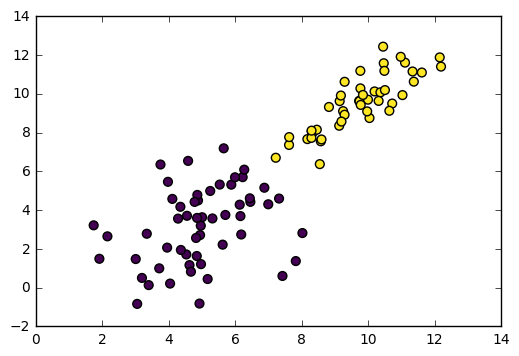

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
labels = gmm.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');

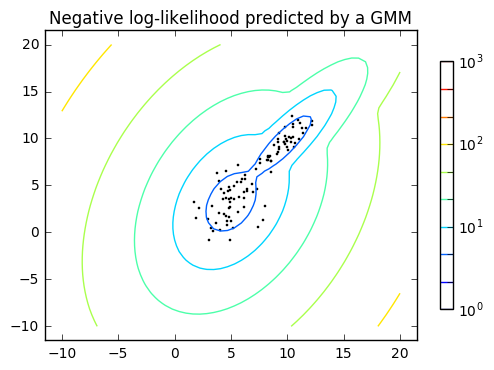

In [107]:
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(-10., 20.)
y = np.linspace(-10., 20.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

#### What happens if you try to fit a different number of clusters to the data? E.g. fit 5 clusters to data generated with only 2 clusters, or vice versa.

In [108]:
## Now we will try fitting a 5 cluster model to the same data

gmm5 =  GMM(n_components=5).fit(X_train)

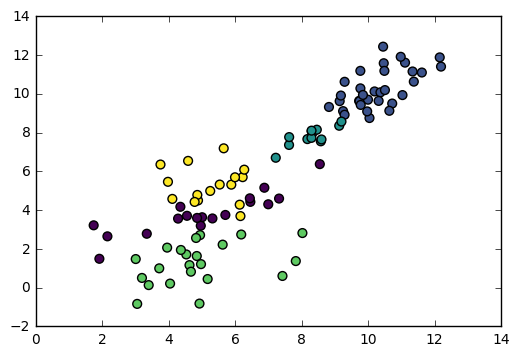

In [109]:
labels5 = labels = gmm5.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');

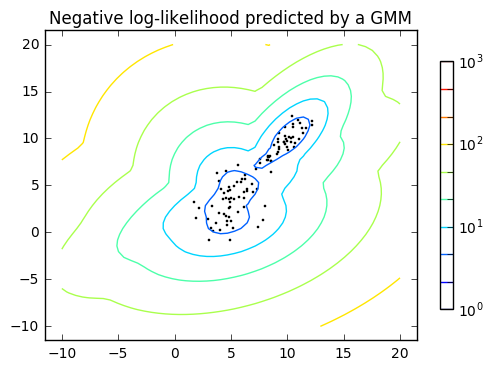

In [110]:
Z = -gmm5.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

We see that our 5 distribution model adds complexity to our likelihood map, without providing any (visually noticeable) explanatory advantage. Given our likelihood maps and classification diagrams, it seems that the best model to use is the 2 Gaussians mixture model, as it is simpler and explains the data as well as the more complicated model. If we had some sort of label and we wanted to use our GMM model for classification, we could use cross validation to see which model has the most accurate classifications. As we are dealing with unlabeled data, using the simplest model that explains the data reasonably well seems to be a sensible approach.